In [197]:
import matplotlib.pyplot as plt
import pandas as pd

MERCADONA_GREEN = "#00783a"

In [198]:
df = pd.read_csv("data/mad1.csv", encoding="utf-8")
df.head(4)

,id,warehouse,language,ean,name,slug,legal_name,unit_price,bulk_price,is_discounted,...,is_new,is_pack,pack_size,description,minimum_amount,weight,brand,origin,supplier,category
0,4240.0,mad1,es,9905000042405,"Aceite de oliva 0,4º Hacendado",aceite-oliva-04o-hacendado-botella,HACENDADO ACEITE DE OLIVA,8.00,8.00,False,...,False,False,NaN,"Aceite de oliva 0,4º Hacendado",1,1.00,Hacendado,España,Aceites Abril S.L.,"Aceite, vinagre y sal"
1,4717.0,mad1,es,9904000047175,Aceite de oliva virgen extra Hacendado,aceite-oliva-virgen-extra-hacendado-garrafa,Aceite De Oliva Virgen Extra,29.55,9.85,False,...,False,False,NaN,Aceite de oliva virgen extra Hacendado,1,3.00,Hacendado,"Puente de Génave, Sierra de Segura. Jaén.",ACEITES MAEVA S.L.U,"Aceite, vinagre y sal"
2,4740.0,mad1,es,9904000047403,Aceite de oliva virgen extra Hacendado,aceite-oliva-virgen-extra-hacendado-botella,ACEITE DE OLIVA VIRGEN EXTRA,9.90,9.90,False,...,False,False,NaN,Aceite de oliva virgen extra Hacendado,1,1.00,Hacendado,Jaén,ACEITES MAEVA S.L.U,"Aceite, vinagre y sal"
3,4706.0,mad1,es,8480000047069,Aceite de oliva virgen extra Hacendado Gran Se...,aceite-oliva-virgen-extra-hacendado-gran-selec...,Aceite de Oliva Virgen Extra,8.10,10.80,False,...,False,False,NaN,Aceite de oliva virgen extra Hacendado Gran Se...,1,0.75,Hacendado,España,Oleoestepa S.C.A.,"Aceite, vinagre y sal"


In [199]:
df[df["unit_price"] > 500].sort_values("unit_price", ascending=False).head(3)

,id,warehouse,language,ean,name,slug,legal_name,unit_price,bulk_price,is_discounted,...,is_new,is_pack,pack_size,description,minimum_amount,weight,brand,origin,supplier,category
1997,24706.0,mad1,es,8480000247063,Alistado mediano congelado,alistado-mediano-congelado-granel,NaN,2965.05,29.95,False,...,False,False,NaN,Alistado mediano congelado,0,NaN,NaN,NaN,NaN,Marisco
4164,24706.0,mad1,es,8480000247063,Alistado mediano congelado,alistado-mediano-congelado-granel,NaN,2965.05,29.95,False,...,False,False,NaN,Alistado mediano congelado,0,NaN,NaN,NaN,NaN,Marisco
2010,24487.0,mad1,es,8480000244871,Bocas de cangrejo pequeñas congeladas,bocas-cangrejo-pequenas-congeladas-granel,NaN,1960.20,19.80,False,...,False,False,NaN,Bocas de cangrejo pequeñas congeladas,0,NaN,NaN,NaN,NaN,Marisco


In [200]:
df = df.loc[~(df["unit_price"] > 500)]

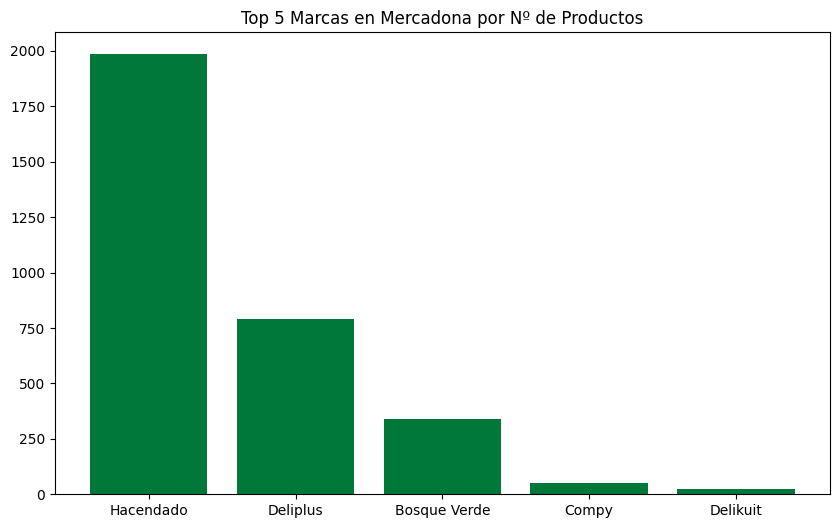

In [201]:
# Group by 'brand' and count the number of rows in each group
brands = df.groupby("brand").size()
sorted_brands = brands.sort_values(ascending=False).nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_brands.index, sorted_brands.values, color=MERCADONA_GREEN)
plt.title("Top 5 Marcas en Mercadona por Nº de Productos")
plt.xticks(rotation=0)
plt.show()

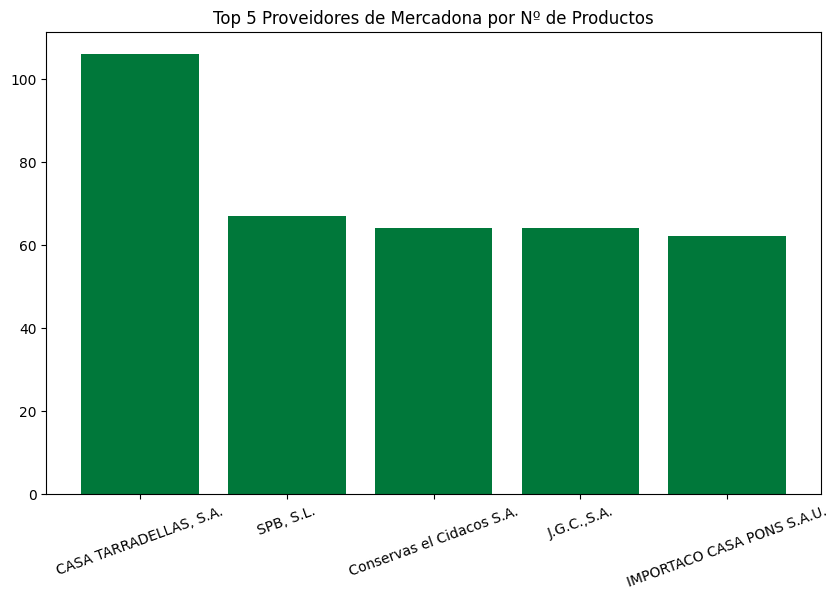

In [202]:
origins = df.groupby("supplier").size().sort_values(ascending=False).nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(origins.index, origins.values, color=MERCADONA_GREEN)
plt.title("Top 5 Proveidores de Mercadona por Nº de Productos")
plt.xticks(rotation=20)
plt.show()

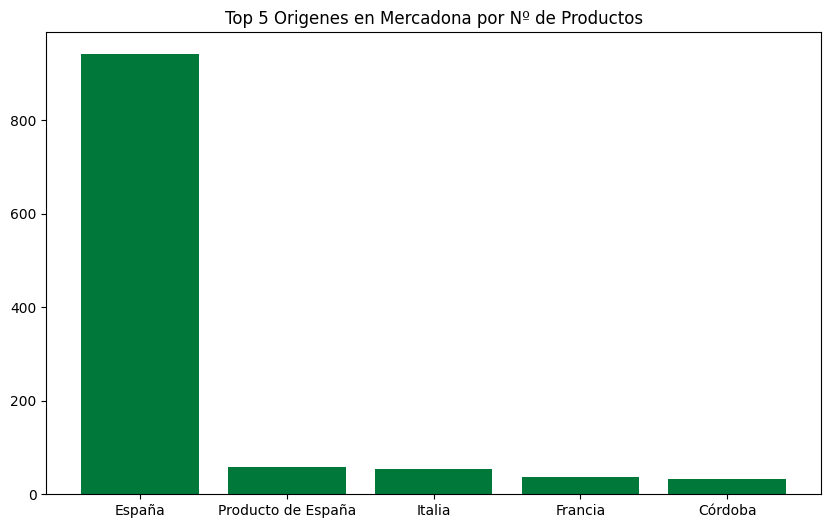

In [203]:
origins = df.groupby("origin").size().sort_values(ascending=False).nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(origins.index, origins.values, color=MERCADONA_GREEN)
plt.title("Top 5 Origenes en Mercadona por Nº de Productos")
plt.show()

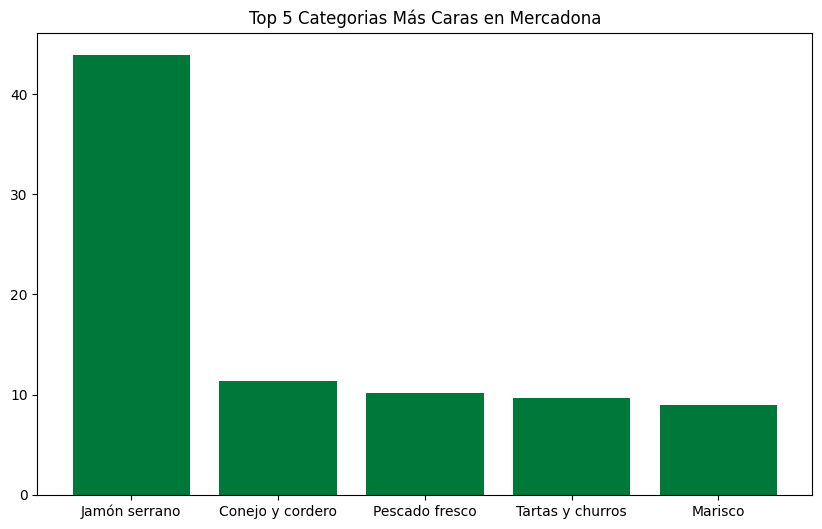

In [204]:
categories = df.groupby("category")["unit_price"].mean().sort_values(ascending=False).nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(categories.index, categories.values, color=MERCADONA_GREEN)
plt.title("Top 5 Categorias Más Caras en Mercadona")
plt.show()

In [205]:
alcohols = df[df["age_check"]]
alcohols.loc[:, "alcohol_by_volume"] = alcohols["alcohol_by_volume"].fillna(0)
alcohols = alcohols[~alcohols["is_discounted"]]

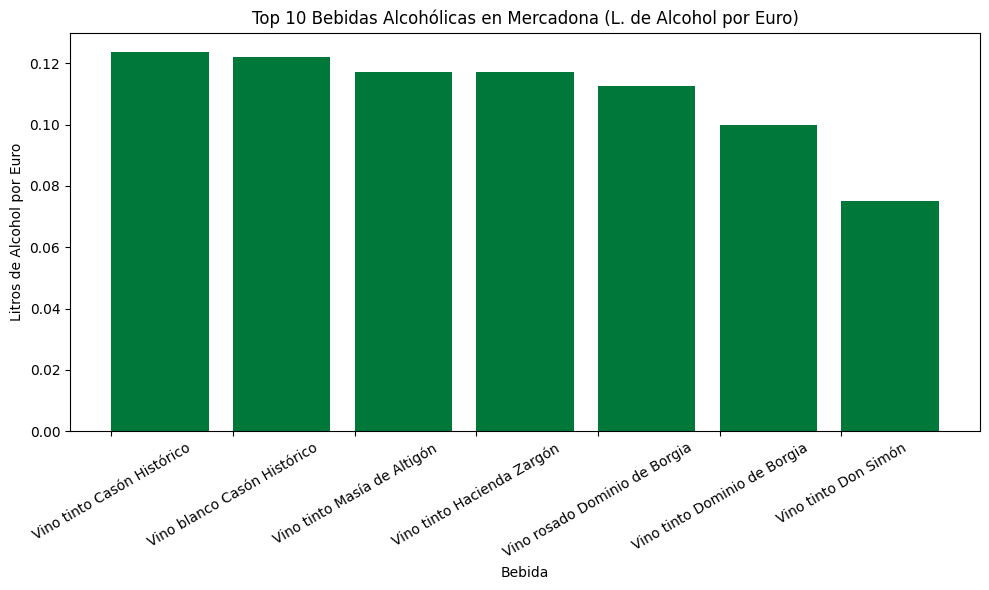

In [206]:
alcohols["alcohol_per_liter"] = (alcohols["alcohol_by_volume"] / 100) * alcohols["weight"]
alcohols["alcohol_per_euro"] = alcohols["alcohol_per_liter"] / alcohols["unit_price"]

top_alcohols = alcohols.sort_values(by="alcohol_per_euro", ascending=False).nlargest(
    7, "alcohol_per_euro"
)

plt.figure(figsize=(10, 6))
plt.bar(top_alcohols["name"], top_alcohols["alcohol_per_euro"], align="edge", color=MERCADONA_GREEN)
plt.title("Top 10 Bebidas Alcohólicas en Mercadona (L. de Alcohol por Euro)")
plt.xlabel("Bebida")
plt.ylabel("Litros de Alcohol por Euro")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

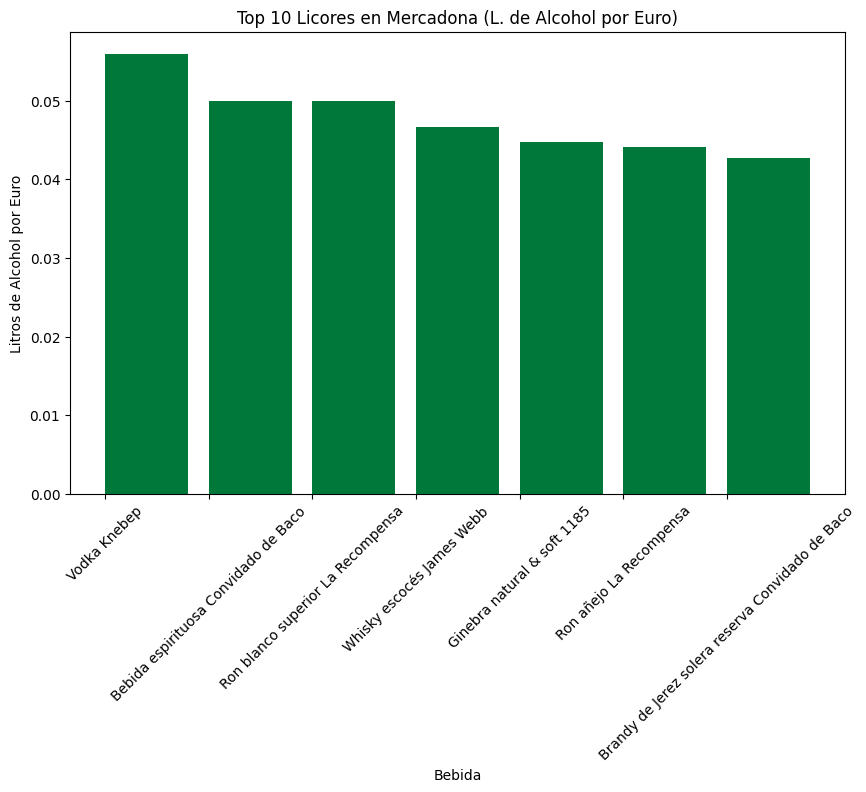

In [207]:
licors = alcohols[alcohols["category"] == "Licores"]

# Remove entries containing "vermouth" in the "name" column
licors = licors[~licors["name"].str.contains("vermouth", case=False)]
top_licors = licors.sort_values(by="alcohol_per_euro", ascending=False).nlargest(
    7, "alcohol_per_euro"
)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(
    top_licors["name"], top_licors["alcohol_per_euro"], align="edge", color=MERCADONA_GREEN
)
plt.title("Top 10 Licores en Mercadona (L. de Alcohol por Euro)")
plt.xlabel("Bebida")
plt.ylabel("Litros de Alcohol por Euro")
plt.xticks(rotation=45)
plt.show()